
# Estimation of Used Car Prices


## Import Libraries
All libraries are used for specific tasks including data preprocessing, visualization, transformation and evaluation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")


---------------------------------------------------------

"--------------Business Problem: Estimate the price of a used car-----------"

## Import Data
### Read Training Data
The training set is read locally and the **head** function is used to display the data for intial understanding

In [ ]:
import pandas as pd

dataTrain = pd.read_csv('data_train.csv')

dataTrain.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


### Read Testing Data
The testing set is read locally and the **head** function is used to display the data for intial understanding

In [ ]:
dataTest = pd.read_csv('data_test.csv')
dataTest.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


In [ ]:
dataTrain = dataTrain.dropna()
dataTest = dataTest.dropna()

In [ ]:
dataTrain.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

Same features are removed for testing set since the data will be used to train the model

In [ ]:
dataTest.drop(['number_of_maintenance', 'duration_listed', 'engine_type','is_exchangeable'], axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.manufacturer_name = labelencoder.fit_transform(dataTrain.manufacturer_name)
dataTrain.transmission = labelencoder.fit_transform(dataTrain.transmission)
dataTrain.color = labelencoder.fit_transform(dataTrain.color)
dataTrain.engine_fuel = labelencoder.fit_transform(dataTrain.engine_fuel)

dataTrain.body_type = labelencoder.fit_transform(dataTrain.body_type)
dataTrain.has_warranty = labelencoder.fit_transform(dataTrain.has_warranty)
dataTrain.ownership = labelencoder.fit_transform(dataTrain.ownership)
dataTrain.type_of_drive = labelencoder.fit_transform(dataTrain.type_of_drive)


Label encoding of all categorical data in the testing set.

In [ ]:
labelencoder1 = LabelEncoder()
dataTest.manufacturer_name = labelencoder1.fit_transform(dataTest.manufacturer_name)
dataTest.transmission = labelencoder1.fit_transform(dataTest.transmission)
dataTest.color = labelencoder1.fit_transform(dataTest.color)
dataTest.engine_fuel = labelencoder1.fit_transform(dataTest.engine_fuel)

dataTest.body_type = labelencoder1.fit_transform(dataTest.body_type)
dataTest.has_warranty = labelencoder1.fit_transform(dataTest.has_warranty)
dataTest.ownership = labelencoder1.fit_transform(dataTest.ownership)
dataTest.type_of_drive = labelencoder1.fit_transform(dataTest.type_of_drive)


In [ ]:
# Calculate the z-score from with scipy
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)
dataTest = stats.zscore(dataTest)

In [ ]:
dataTrain

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,1.280871,-1.411269,-1.252177,-0.874833,1.618931,-1.367799,-0.676781,1.095981,-0.107496,0.138074,-0.000076,1.194379,1.005626
1,0.715138,0.708582,-0.695729,-0.735477,1.123006,0.718575,-0.676781,0.412761,-0.107496,0.138074,-0.000076,-0.107566,0.131353
2,-0.290610,-1.411269,-0.695729,-1.021524,1.370968,0.718575,-0.676781,-1.636898,-0.107496,0.138074,-0.000076,-0.758539,0.858625
3,0.463701,-1.411269,0.417166,0.042718,0.503099,0.718575,-0.380528,-1.636898,-0.107496,0.138074,-0.000076,0.055177,-0.263231
4,0.149405,0.708582,-0.973953,2.939129,-0.488752,0.718575,-0.084275,0.412761,-0.107496,0.138074,-0.000076,-0.758539,-0.564971
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.463701,0.708582,1.530061,0.958803,-0.860696,0.718575,-0.676781,0.412761,-0.107496,0.138074,-0.000076,-1.246769,-0.487602
49996,1.280871,0.708582,-0.417505,0.454281,-1.108659,-0.324612,-0.380528,1.095981,-0.107496,0.138074,-0.000076,0.868893,-0.588182
49997,-0.919202,0.708582,0.695390,0.005312,-0.488752,0.718575,-0.380528,-1.978507,-0.107496,0.138074,-0.000076,-0.433053,-0.719710
49998,-1.547795,-1.411269,-0.139282,2.682420,-0.612734,-1.367799,0.656356,1.095981,-0.107496,0.138074,1.890544,0.055177,-0.243115


In [ ]:
dataTest

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive,number_of_photos,price_usd
0,-1.560894,-1.409199,1.543088,-0.982904,1.124098,0.741569,3.536276,0.414205,-0.110733,0.139031,-1.890440,3.731328,2.176823
1,0.202193,0.709623,0.429561,1.856936,-0.488073,-1.375240,0.222862,0.414205,-0.110733,0.139031,1.887361,-0.437492,-0.630775
2,-0.931220,0.709623,0.986324,-0.282164,-0.116033,0.741569,-1.283235,-1.631869,-0.110733,0.139031,-0.001539,1.063283,-0.583589
3,0.328128,-1.409199,1.264706,0.337437,-0.364060,-1.375240,1.728960,0.755217,-0.110733,0.139031,-1.890440,0.062766,0.139938
4,0.454063,-1.409199,-0.962348,-0.031373,-0.612086,0.741569,-0.680796,0.414205,-0.110733,0.139031,-0.001539,-0.103987,-0.693690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,1.272639,0.709623,1.264706,-1.152557,-1.232151,0.741569,-0.078357,-1.631869,-0.110733,0.139031,-0.001539,0.563025,-0.515483
26996,-0.553416,-1.409199,0.986324,-0.834015,0.752058,-0.316835,2.180789,0.414205,-0.110733,0.139031,-1.890440,-0.270739,0.297227
26997,1.272639,0.709623,1.543088,1.488125,-1.232151,0.741569,-0.379577,0.414205,-0.110733,0.139031,-0.001539,-0.604245,-0.866708
26998,-1.623862,0.709623,-0.127203,0.197289,0.380019,0.741569,-0.078357,0.414205,-0.110733,0.139031,-0.001539,-0.437492,-0.048808


In [ ]:
x_train=dataTrain.iloc[:,0:11]
y_train=dataTrain.iloc[:,12]
x_test=dataTest.iloc[:,0:11]
y_test=dataTest.iloc[:,12]

In [ ]:
x_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_capacity,body_type,has_warranty,ownership,type_of_drive
0,1.280871,-1.411269,-1.252177,-0.874833,1.618931,-1.367799,-0.676781,1.095981,-0.107496,0.138074,-0.000076
1,0.715138,0.708582,-0.695729,-0.735477,1.123006,0.718575,-0.676781,0.412761,-0.107496,0.138074,-0.000076
2,-0.290610,-1.411269,-0.695729,-1.021524,1.370968,0.718575,-0.676781,-1.636898,-0.107496,0.138074,-0.000076
3,0.463701,-1.411269,0.417166,0.042718,0.503099,0.718575,-0.380528,-1.636898,-0.107496,0.138074,-0.000076
4,0.149405,0.708582,-0.973953,2.939129,-0.488752,0.718575,-0.084275,0.412761,-0.107496,0.138074,-0.000076


In [ ]:
y_train.head()

0    1.005626
1    0.131353
2    0.858625
3   -0.263231
4   -0.564971
Name: price_usd, dtype: float64

## Fit Model
### Multiple Linear Regression
Calling multiple linear regression model and fitting the training set

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

Making price prediction using the testing set (Fit to MLR)

In [ ]:
y_pred1 = model_mlr.predict(x_test)


In [ ]:
#randomly checking the y-test values
y_test[0]

2.1768230718220067

In [ ]:
#randomly checking the y-pred values
y_pred1[0]

1.778739838179258

y_test[0]   and   y_pred1[0]   have different values.. In other words, there is error

### MLR Evaluation


Calculating the Mean Square Error for MLR model

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.35446042212121065


Calculating the Mean Absolute Error for MLR model

In [ ]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.38606014047919046


### Random Forest Regressor (checking other Models)
Calling the random forest model and fitting the training data

In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

Prediction of car prices using the testing data

In [ ]:
y_pred2 = model_rf.predict(x_test)

### Random Forest Evaluation


Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)

In [ ]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.040789761590753565


Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)

In [ ]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.10790549706828026


### LASSO Model
Calling the model and fitting the training data

In [ ]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

Price prediction uisng testing data

In [ ]:
y_pred3 = model_lm.predict(x_test)

### LASSO Evaluation  (checking another model)


Mean Absolute Error for LASSO Model

In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.7161592773445759


Mean Squared Error for the LASSO Model

In [ ]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.0


In [ ]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.386060
1,Random Forest,0.107905
2,LASSO,0.716159


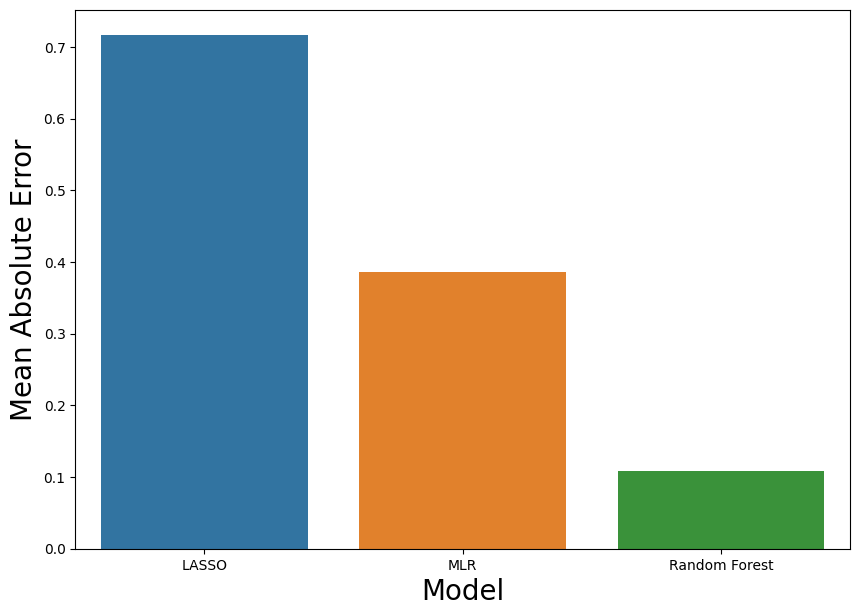

In [ ]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

plt.show()

#Based on the MAE, it is concluded that the Random Forest is the best regression model for predicting the car price

In [ ]:
import pickle
pickle.dump(model_rf,open('mymodel.pkl','wb'))

In [ ]:
with open('model_pickle', 'wb') as f:
  pickle.dump(model_rf,f)

In [ ]:
with open('model_pickle', 'rb') as f:
  mp = pickle.load(f)

In [ ]:
input_data = (3,	0,	10,	115000,	2012,	2,	4.4,	8,	0,	2,	0	)
#input_data = (48,	1	,1	,1000000,	1990,	0,	1.9,	5,	0,	2,	2)
#change the inut dta to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape as we predict for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = mp.predict(input_data_reshaped)
print(prediction)

[2.5841684]
